Lade Kohorte aus der Datenbank...
Anzahl Patienten: 10000

Erste 5 Zeilen:


,subject_id,hadm_id,icustay_id,intime,outtime,gender,age,los_days,hospital_expire_flag
0,3,145834,211552,2101-10-20 19:10:11,2101-10-26 20:43:09,M,76.5,6.06,0
1,4,185777,294638,2191-03-16 00:29:31,2191-03-17 16:46:31,F,47.8,1.68,0
2,6,107064,228232,2175-05-30 21:30:54,2175-06-03 13:39:54,F,65.9,3.67,0
3,9,150750,220597,2149-11-09 13:07:02,2149-11-14 20:52:14,M,41.8,5.32,1
4,11,194540,229441,2178-04-16 06:19:32,2178-04-17 20:21:05,F,50.1,1.58,0


C:\Users\Simon\AppData\Local\Temp\ipykernel_38460\1150265516.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, ax=axes[1], palette='pastel')
C:\Users\Simon\AppData\Local\Temp\ipykernel_38460\1150265516.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hospital_expire_flag', data=df, ax=axes[2], palette='muted')
C:\Users\Simon\AppData\Local\Temp\ipykernel_38460\1150265516.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Überlebt', 'Verstorben'])


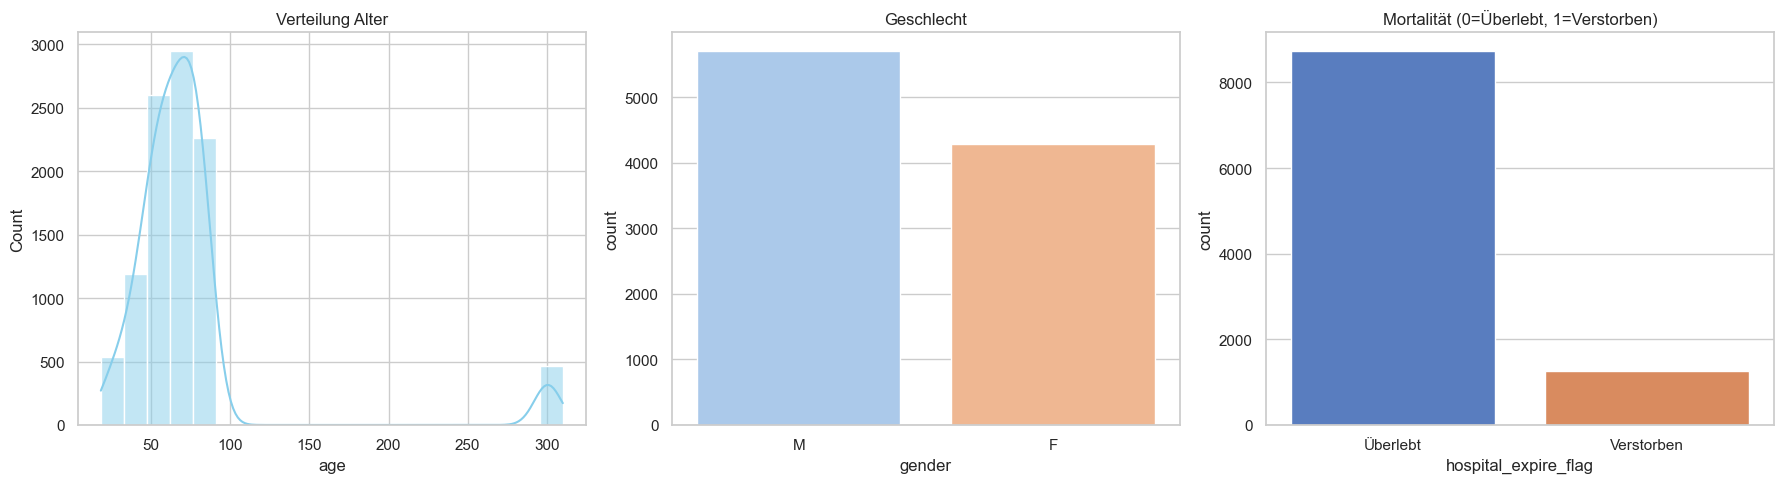

In [5]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Damit wir unsere db_connect Datei finden
sys.path.append(os.path.abspath('..'))
from src.db_connect import load_sql

# 1. Daten laden
print("Lade Kohorte aus der Datenbank...")
df = load_sql('../sql/get_cohort.sql')

# 2. Überblick
print(f"Anzahl Patienten: {len(df)}")
print("\nErste 5 Zeilen:")
display(df.head())

# 3. Visualisierung (Wer sind diese Patienten?)
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Alter
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Verteilung Alter')

# Geschlecht
sns.countplot(x='gender', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Geschlecht')

# Mortalität
sns.countplot(x='hospital_expire_flag', data=df, ax=axes[2], palette='muted')
axes[2].set_title('Mortalität (0=Überlebt, 1=Verstorben)')
axes[2].set_xticklabels(['Überlebt', 'Verstorben'])

plt.tight_layout()
plt.show()

In [2]:
# Check: In welchem Schema liegen die Tabellen?
import pandas as pd
from src.db_connect import load_sql, get_engine

engine = get_engine()
query = """
SELECT table_schema, table_name 
FROM information_schema.tables 
WHERE table_name = 'icustays';
"""

with engine.connect() as conn:
    print(pd.read_sql(query, conn))

  table_schema table_name
0       public   icustays
